In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("homeprices_banglore.csv")
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [3]:
df['price'].values

array([ 39.07, 120.  ,  62.  ,  75.  ,  51.  ,  38.  , 135.  , 155.  ,
        50.  , 167.  ,  82.  , 140.  ,  38.  ,  40.  , 101.  ,  42.  ,
        48.  ,  60.  , 102.  ,  32.  ])

In [4]:
from sklearn import preprocessing

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price', axis= 1))

""" min-max scaler cho cột price vì min-max scaler chỉ áp dụng cho mảng 2D
mà price đang là mảng 1D nên lí do tại sao mình phải reshape lại thành tất cả các hàng và 1 cột"""
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0], 1)) 

In [5]:
scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [6]:
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [7]:
scaled_X.shape

(20, 2)

In [15]:
scaled_y.reshape(20,)

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

In [8]:
np.ones(3)

array([1., 1., 1.])

#### 1. Batch Gradient Descent (BGD)

In [9]:
def batch_GD(X, y_true, epochs, learning_rate = 0.01):
    
    # we have number of feature of scaled_X is 2
    number_of_features = X.shape[1]
    weights = np.ones(shape = (number_of_features)) # khởi tạo các trọng số w có giá trị trong matrix = 1
    bias = 0
    total_samples = X.shape[0] # number of rows in X
    
    cost_list = []
    epoch_list = []
    
    # Formula loss function MSE: L(w, b) = 1/n sum(y_true - y_pred)^2
    # với y_pred = weight*x + bias
    
    for i in range(epochs):
        
        # start
        """Ở đây ta phải chuyển vị ma trận X để nhân tích vô hướng 2 ma trận vì w và X 
        là 2 ma trận cùng dòng cùng cộtnên ta phải chuyển bị X để có thể nhân tích vô hướng"""
        y_pred = np.dot(weights, X.T) + bias # formula của y_pred = weight*x + bias
        
        w_derivative = -(2/total_samples)*(X.T.dot(y_true - y_pred)) # đạo hàm từng phần theo trọng số weight
        b_deriative = -(2/total_samples)*np.sum(y_true - y_pred) # đạo hàm từng phần theo trọng số bias
        
        # Sau khi đạo hàm từng phần thì ta sẽ cập nhật lại trọng số w và b để nó giảm loss --> đó chính là GD
        weights = weights - learning_rate * w_derivative 
        bias = bias - learning_rate * b_deriative
        
        cost = np.mean(np.square(y_true - y_pred)) # cuối cùng là tính cost cuối cùng
        # end (đáng lẽ cái phần batch_GD tới đây là kết thúc rồi)
        
        # từ dòng này là để lưu lại mỗi lần nó chạy 10 epochs nó sẽ cập nhật giá trị để vẽ graph
        if i%10 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return weights, bias, cost, cost_list, epoch_list

In [17]:
w, b, cost, cost_list, epoch_list = batch_GD(scaled_X, scaled_y.reshape(scaled_y.shape[0],), 500)

In [18]:
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407422, 0.0068641890429808105)

#### Now we plot Batch Gradient Descent graph

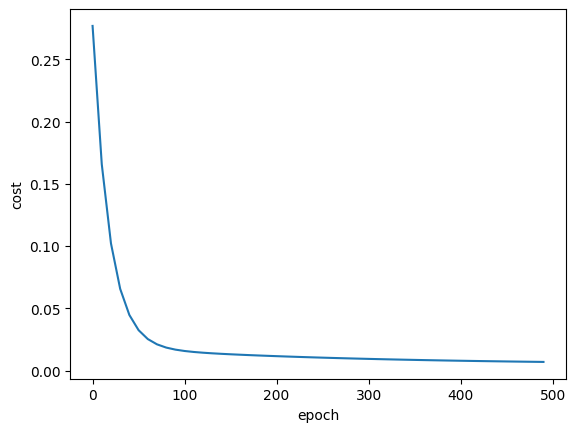

In [23]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list, cost_list)

In [35]:
def predict_price(area, bedrooms, w, bias):
    scaled_features = sx.transform([[area, bedrooms]]) # scaled_features có kích thước (1, 2)
    
    # Tính giá trị dự đoán (trên dữ liệu đã chuẩn hóa)
    scaled_price = w[0]*scaled_features[0][0] + w[1]*scaled_features[0][1] + bias
    
    # Đảo ngược quá trình chuẩn hóa để lấy giá trị giá gốc
    price = sy.inverse_transform([[scaled_price]])[0][0] # Trả về giá trị gốc của giá nhà
    return price

In [36]:
predict_price(2600, 4, w, b)

d:\Python Download\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.45484403267596

In [37]:
predict_price(2732,4, w, b)

d:\Python Download\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


132.80000304445733

#### 2. Stochastic Gradient Descent Implementationm (SGD)

Stochastic GD will use randomly picked single training sample to calculate error and using this error we backpropage to adjust weights

In [38]:
import random

In [56]:
def stochastic_GD(X, y_true, epochs, learning_rate = 0.01):
    
    number_of_features = X.shape[1]
    weight = np.ones(shape=(number_of_features))
    bias = 0
    total_samples = X.shape[0]
    
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        
        # start
        random_ind = random.randint(0, total_samples-1) # Bước chọn random attribute
        sample_x = X[random_ind] # chọn ra 2 thuộc tính area, bedrooms của 1 hàng bất kì
        sample_y = y_true[random_ind] # cũng tương tự như sample_x chọn 1 thuộc tính bất kì
        
        y_pred = np.dot(weight, sample_x.T) + bias 
        
        w_derivative = -(2/total_samples) * (sample_x.T*(sample_y - y_pred)) # đạo hàm riêng theo trọng số weight
        b_derivative = -(2/total_samples) * (sample_y - y_pred) # đạo hàm riêng theo trọng số bias
        
        weight = weight - learning_rate * w_derivative
        bias = bias - learning_rate * b_derivative
        
        cost = np.mean(np.square(sample_y - y_pred))
        # end

        # bước thêm những cost mà được chuẩn hóa và epoch để phục vụ cho việc graph SGD
        if i%100 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
            
    return weight, bias, cost, cost_list, epoch_list

In [57]:
w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_GD(scaled_X, scaled_y.reshape(scaled_y.shape[0],), 10000)

In [58]:
w_sgd, b_sgd, cost_sgd

(array([0.70556831, 0.67115117]), -0.23044281686970103, 0.0034224866591119453)

#### Now we plot Stochastic Gradient Descent graph

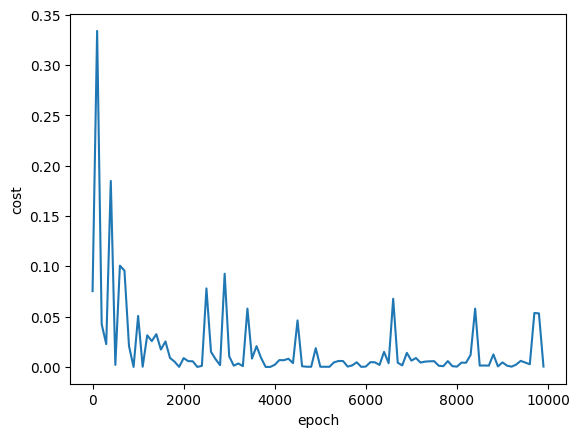

In [59]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd, cost_list_sgd)

In [60]:
predict_price(2770, 3, w_sgd, b_sgd)

d:\Python Download\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


110.89840375397497

In [61]:
predict_price(1310, 3, w_sgd, b_sgd)

d:\Python Download\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


62.9440884073776